In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import cohen_kappa_score,matthews_corrcoef

In [3]:

dataframe=pd.read_csv(r"C:\Users\Windows\Documents\ANN\malaria\dataset\malaria_clin_data.csv")

In [4]:
subset=dataframe.iloc[:,16:]

In [5]:
subset.dropna(inplace=True)

In [6]:
subset['Clinical_Diagnosis'].unique()

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)

In [7]:
X=subset.iloc[:,1:]
y=subset.iloc[:,0]

In [8]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X=min_max_scaler.fit_transform(X)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=20)

In [11]:
X_train.shape

(1724, 17)

In [12]:
X_test.shape

(432, 17)

In [13]:
def evaluate(model,xtest,ytest,name):
    
    ypred=model.predict(xtest)  

    accuracy=np.round(balanced_accuracy_score(ytest,ypred),4)
    
    precision=np.round(precision_score(ytest,ypred,average = 'weighted'),4)

    recall=np.round(recall_score(ytest,ypred,average = 'weighted'),4)
    
    f1score=np.round(f1_score(ytest,ypred,average = 'weighted'),4)
    
    cohenkappa_score=np.round(cohen_kappa_score(ytest,ypred),4)
 
    matthews_corrcoef_=np.round(matthews_corrcoef(ytest,ypred),4)
    
    return accuracy,precision,recall,f1score,cohenkappa_score,matthews_corrcoef_
    

In [14]:

def fit_data(xtrain,ytrain,xtest,ytest):
    
    #Adaboost Classifier
    ADB=AdaBoostClassifier()
    ADB.fit(xtrain,ytrain)

    #XGBoost Classifier
    XGB=XGBClassifier(num_class=labels.shape,eval_metric='mlogloss',use_label_encoder =False)
    XGB.fit(xtrain,ytrain)
    
    #Random Forest Classifier
    RF=RandomForestClassifier(max_features=0.2)
    RF.fit(xtrain,ytrain)

    #Support Vector Machine Classifier
    SVM=SVC()
    SVM.fit(xtrain,ytrain)

    #K-nearest Neighbor classifier
    KNN=KNeighborsClassifier()
    KNN.fit(xtrain,ytrain)

    #Naive Bayes Classifier
    NB=GaussianNB()
    NB.fit(xtrain,ytrain)

    #Extra Trees Classifier
    ETC=ExtraTreesClassifier()
    ETC.fit(xtrain,ytrain)

    #Logistic Regression
    
    LOGREG =LogisticRegression(C = 50, multi_class = 'multinomial',solver='lbfgs', max_iter=3000)
    LOGREG.fit(xtrain,ytrain)

    #this list will be used to store the scores for all classifiers
    performance_list=[]

    #performance metrics to be used for evaluating the classifiers
    performance_metrics=['Accuracy','Precision','Recall','F1score',
                    'Cohen_kappa_score','Matthews coefficient']
    indices=[]
	
    #create a dictionary object to store the models
    model_dict={'KNN':KNN,'Random Forest':RF,'LOGREG':LOGREG,'SVM':SVM,'Naive Bayes':NB,
            'XGBoost':XGB,'Extra Trees':ETC,'Adaboost':ADB}

    #evaluate the each model stored in the dictionary object
    for name,model in model_dict.items():
        performance=evaluate(model,xtest,ytest,name)
        performance_list.append(performance)
        indices.append(name)
        
    performance_frame=pd.DataFrame(performance_list,columns=performance_metrics,index=indices)
    return performance_frame

In [15]:
result=fit_data(X_train,y_train,X_test,y_test)

C:\Users\Windows\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [16]:
result[result['F1score']>=0.81]

,Accuracy,Precision,Recall,F1score,Cohen_kappa_score,Matthews coefficient
KNN,0.8064,0.8144,0.8102,0.8106,0.7080,0.7094
Random Forest,0.8239,0.8239,0.8241,0.8229,0.7303,0.7314
SVM,0.8175,0.8173,0.8171,0.8165,0.7197,0.7205
Extra Trees,0.8102,0.8124,0.8125,0.8103,0.7120,0.7143


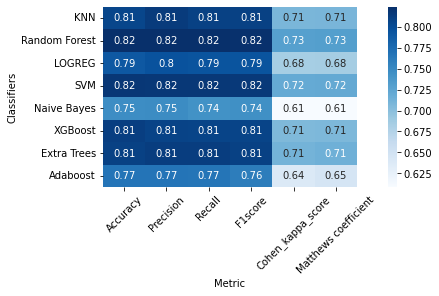

In [17]:
plt.rcParams['figure.constrained_layout.use'] = True

sns.heatmap(result,annot=True,cmap='Blues')
plt.xlabel('Metric')
plt.ylabel('Classifiers')
plt.xticks(rotation=45)
plt.show()


In [18]:
result.to_csv('scores.csv')

In [19]:
subset=dataframe.iloc[:,16:]

<AxesSubplot:>

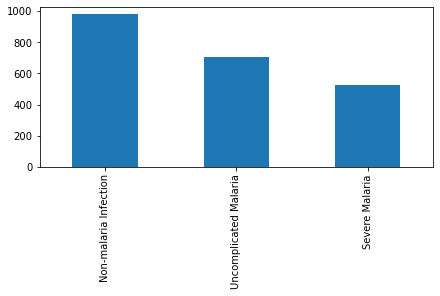

In [20]:
subset['Clinical_Diagnosis'].value_counts().plot.bar()

In [21]:
subset.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wbc_count,2207.0,10.734209,5.924517,0.5,6.85,9.30,12.90,53.90
rbc_count,2207.0,3.890689,1.139474,0.5,3.30,4.15,4.64,6.67
hb_level,2207.0,9.360222,2.680846,1.4,7.80,10.10,11.30,18.70
hematocrit,2207.0,29.101541,8.912130,4.3,23.70,31.60,35.40,52.70
mean_cell_volume,2207.0,74.635850,8.239094,7.8,69.80,75.00,80.00,121.00
mean_corp_hb,2204.0,24.102704,3.227082,2.1,22.10,24.10,26.20,38.80
mean_cell_hb_conc,2205.0,32.304259,2.893977,15.7,30.60,32.10,33.50,46.60
platelet_count,2198.0,213.672611,129.661849,3.0,104.00,199.50,299.00,1087.00
platelet_distr_width,2175.0,14.124184,3.092620,0.0,12.90,14.90,15.60,23.90
mean_platelet_vl,2190.0,8.026119,1.196604,3.3,7.20,7.90,8.80,18.60


In [22]:
subset.corr()

,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
wbc_count,1.000000,-0.215911,-0.280032,-0.257717,-0.145939,-0.084586,0.063378,0.117240,0.026464,-0.097053,0.088139,-0.084452,-0.057166,0.874101,0.690599,0.712684,0.253027
rbc_count,-0.215911,1.000000,0.897934,0.922757,0.000795,-0.331203,-0.500313,0.413564,0.005481,0.288561,0.085132,-0.079153,-0.065616,-0.128069,-0.240143,-0.204628,-0.375429
hb_level,-0.280032,0.897934,1.000000,0.969541,0.304692,0.042533,-0.310773,0.359394,0.070999,0.251056,0.167460,-0.161536,-0.103887,-0.146408,-0.339689,-0.275725,-0.568930
hematocrit,-0.257717,0.922757,0.969541,1.000000,0.298852,-0.079281,-0.486230,0.393913,0.095319,0.288361,0.124999,-0.116482,-0.095197,-0.144510,-0.295889,-0.256512,-0.518900
mean_cell_volume,-0.145939,0.000795,0.304692,0.298852,1.000000,0.727872,-0.098523,0.012129,0.273921,0.042220,0.092703,-0.074681,-0.121009,-0.075562,-0.160678,-0.202229,-0.414848
mean_corp_hb,-0.084586,-0.331203,0.042533,-0.079281,0.727872,1.000000,0.553402,-0.191677,0.094383,-0.185925,0.147046,-0.147104,-0.068551,-0.011094,-0.147627,-0.110137,-0.332936
mean_cell_hb_conc,0.063378,-0.500313,-0.310773,-0.486230,-0.098523,0.553402,1.000000,-0.317750,-0.197016,-0.333055,0.106864,-0.130399,0.051530,0.084906,-0.015885,0.092313,0.003891
platelet_count,0.117240,0.413564,0.359394,0.393913,0.012129,-0.191677,-0.317750,1.000000,0.068548,-0.031689,-0.053615,0.041523,0.077471,0.100239,0.071227,0.132598,-0.108182
platelet_distr_width,0.026464,0.005481,0.070999,0.095319,0.273921,0.094383,-0.197016,0.068548,1.000000,0.232103,0.000499,0.019560,-0.087290,0.017969,0.042244,-0.044495,-0.085538
mean_platelet_vl,-0.097053,0.288561,0.251056,0.288361,0.042220,-0.185925,-0.333055,-0.031689,0.232103,1.000000,-0.055175,0.053534,0.033285,-0.114179,-0.019647,-0.058006,-0.115076


<AxesSubplot:>

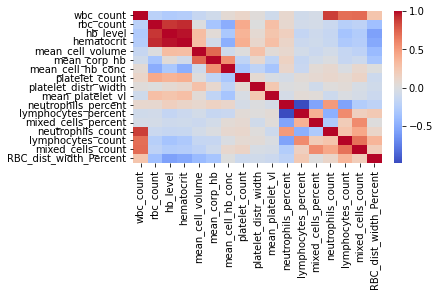

In [23]:
sns.heatmap(subset.corr(),cmap='coolwarm')

In [24]:
from sklearn.metrics import plot_confusion_matrix

In [25]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_scaled=min_max_scaler.fit_transform(X_train)
X_test_scaled=min_max_scaler.fit_transform(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train_scaled,y_train)

RandomForestClassifier()

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


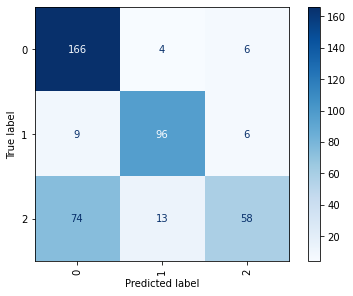

In [27]:
disp=plot_confusion_matrix(clf,X_test_scaled,y_test,xticks_rotation='vertical',
                     cmap='Blues',display_labels=classes)

In [28]:
y_pred=clf.predict(X_test_scaled)
balanced_accuracy=balanced_accuracy_score(y_test,y_pred)
balanced_accuracy=round(balanced_accuracy,2)
print('balanced accuracy:',balanced_accuracy)

balanced accuracy: 0.74


In [29]:
f1score=f1_score(y_test,y_pred,average='weighted')
f1score=round(f1score,2)
print('f1score:',f1score)


f1score: 0.72


In [30]:
precision=precision_score(y_test,y_pred,average='weighted')
precision=round(precision,2)
print('precision:',precision)

precision: 0.77


In [31]:
recall=recall_score(y_test,y_pred,average='weighted')
recall=round(recall,2)
print('recall:',recall)

recall: 0.74
